In [1]:
import torch
from refactor.probes import model_setup

In [2]:
model_names = ["gpt_gptsw3_en_da_356m_gbs1024","gpt_gptsw3_en_da_is_356m_gbs1024","gpt_gptsw3_en_is_da_356m_gbs1024","gpt_sw3_356m"]
lambda_val = 5
layer = "transformer.h.15.ln_1.bias"
for model_name in model_names:
    
    model_path = "downloaded_models/"

    model, tokenizer, device = model_setup(f"{model_path}{model_name}")
    
    steering = torch.load(f"steering_vectors/{model_name}/combined_steering_vector_layer_15_tensor.pt",map_location = device)
    
    model.state_dict()[layer] += steering*lambda_val
    
    model.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')
    tokenizer.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')  # Optional but recommended

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

In [13]:
import pandas as pd
df = pd.read_csv("results/data/steering_data_bible/bible_data_combined.csv")

In [14]:
df = df[df.layer == 15]

<Axes: >

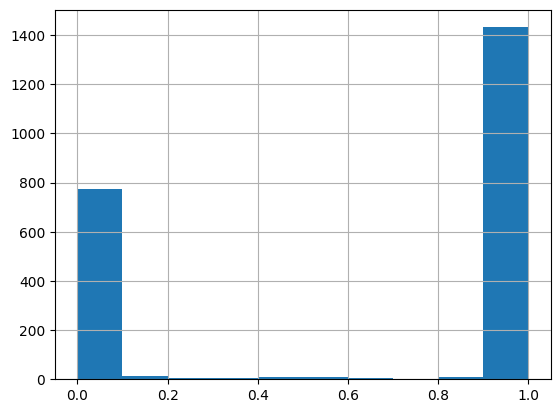

In [24]:
df.danish_language_prediction_on_english_steered.hist()

In [30]:
df[df.danish_prompt_score < 0.6]

,danish_predicted_output,english_predicted_output,danish_true_label,english_true_label,layer,lambda_amount,bible_verse,danish_prompt_score,english_prompt_score,danish_language_prediction_on_english_steered
255,.<|endoftext|>,"Men og mænd, alle mænd og alle mænd, som gik ...",Da kom Vandfloden over Jorden i fyrretyve Dage...,The flood was forty days on the earth. The wat...,15,10,175,0.01,0.0,1.00
327,\nI disse dage kommer jeg ofte selv for sent e...,"For der er i virkeligheden kun én Gud, og ...",Da kom Vandfloden over Jorden i fyrretyve Dage...,The flood was forty days on the earth. The wat...,15,5,175,0.45,0.0,1.00
375,"\nThe Lamanites were angry, but he and those w...",Hellig Amen. De 17.08.1998. Se i Guds hell...,Da kom Vandfloden over Jorden i fyrretyve Dage...,The flood was forty days on the earth. The wat...,15,15,175,0.00,0.0,1.00
399,.<|endoftext|>,"dansk: Hvis du ikke har et brugernavn, ska...","Da sagde Gud til Noa: ""Jeg har besluttet at gø...","God said to Noah, ""The end of all flesh has co...",15,2,149,0.01,0.0,1.00
447,.<|endoftext|>,"12. For at det er det, du er, men ikke det...","Da sagde Gud til Noa: ""Jeg har besluttet at gø...","God said to Noah, ""The end of all flesh has co...",15,10,149,0.01,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...
54039,"\nEnglish: ""When the LORD told Noah, 'I have p...",jeg vil ødelægge dem med jorden. Sådan ska...,Men du skal gøre dig en Ark af Gofertræ og ind...,Make a ship of gopher wood. You shall make roo...,15,15,150,0.00,0.0,1.00
54087,\nNow when he passed through the land on both ...,27 Menneskeslægten er fortabt. 28 Menneskeslæ...,Men du skal gøre dig en Ark af Gofertræ og ind...,Make a ship of gopher wood. You shall make roo...,15,5,150,0.00,0.0,1.00
54135,\n18:1) Gud fortalte Noa at han hadde bestemt ...,"Det er jo helt hen i vejret, at det skal v...",Men du skal gøre dig en Ark af Gofertræ og ind...,Make a ship of gopher wood. You shall make roo...,15,15,150,0.00,0.0,1.00
54231,"\n19 And the LORD said to Him, I will extermin...","""I har gjort jorden, til jorden; og jo...",Men Noa fandt Nåde for HERRENs Øjne,But Noah found favor in Yahweh's eyes.,15,15,144,0.00,0.0,0.01


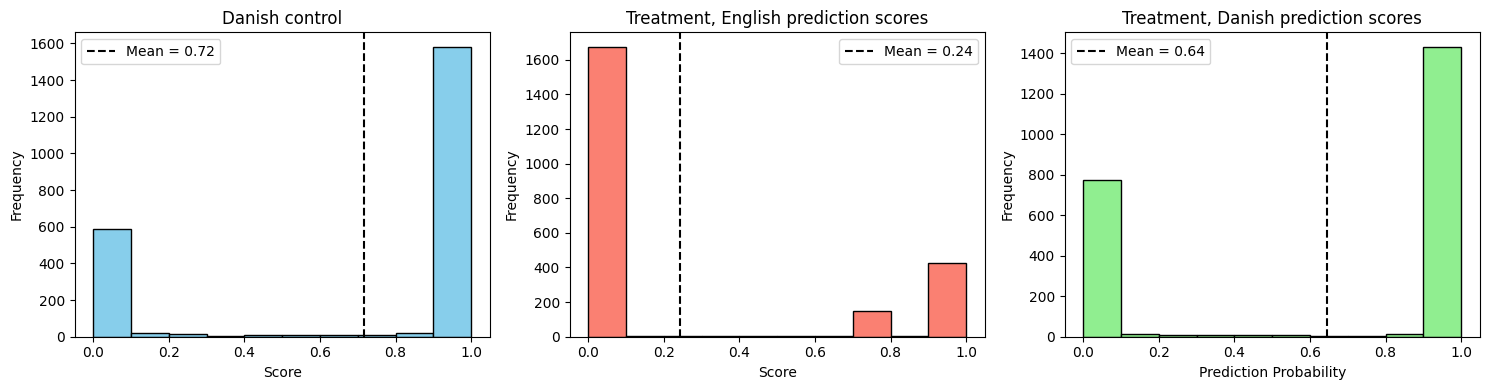

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

model_name_temp = "gpt_sw3_356m"
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Data and titles
columns = [
    ("danish_prompt_score", "Danish control", "Score"),
    ("english_prompt_score", "Treatment, English prediction scores", "Score"),
    ("danish_language_prediction_on_english_steered", "Treatment, Danish prediction scores", "Prediction Probability")
]

colors = ["skyblue", "salmon", "lightgreen"]

# Plot histograms with mean lines
for ax, (col, title, xlabel), color in zip(axs, columns, colors):
    ax.hist(df[col], bins=10, color=color, edgecolor='black')
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='black', linestyle='--', linewidth=1.5, label=f'Mean = {mean_val:.2f}')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.savefig(f"results/bible_study/{model_name_temp}.png",dpi = 300)
plt.show()



In [43]:
sub = df[df.danish_language_prediction_on_english_steered == 1.0]

In [54]:
sub[sub.bible_verse == 160].danish_true_label.iloc[0]

'Af alle rene Dyr skal du tage syv Par, Han og Hun, og af alle urene Dyr eet Par, Han og Hun,'

In [51]:
sub[sub.bible_verse == 160].english_true_label.iloc[0]

'You shall take seven pairs of every clean animal with you, the male and his female. Of the animals that are not clean, take two, the male and his female.'

In [57]:
sub.english_predicted_output.iloc[1]

' af de dyr, som ikke er rene, tager to, den mandlige og den kvindelige. af de dyr, der er rene, tager to, den mandlige og den kvindelige. af de dyr, som er rene, tager to, den mandlige og den kvindelige. af de dyr, der er rene, tager to, den mandlige'

In [65]:
sub.danish_predicted_output.iloc[1]

', af ren og af urene dyr en han, ufrugtbar og ufrugtbar<|endoftext|>'

In [63]:
sub[["english_predicted_output"]].iloc[10]

english_predicted_output      Hellig Amen.  De 17.08.1998.  Se i Guds hell...
Name: 375, dtype: object

In [55]:
sub[["english_true_label"]].iloc[1]

english_true_label    Also of the birds of the sky, seven and seven,...
Name: 87, dtype: object

In [64]:
sub

,danish_predicted_output,english_predicted_output,danish_true_label,english_true_label,layer,lambda_amount,bible_verse,danish_prompt_score,english_prompt_score,danish_language_prediction_on_english_steered
63,"men af alle blandede, også af alle rene dyr e...",of de andre. af de andre. 4. engelsk: Deta...,"ligeledes af Himmelens Fugle syv Par, Han og H...","Also of the birds of the sky, seven and seven,...",15,10,161,1.0,0.0,1.0
87,", af ren og af urene dyr en han, ufrugtbar og ...","af de dyr, som ikke er rene, tager to, den ma...","ligeledes af Himmelens Fugle syv Par, Han og H...","Also of the birds of the sky, seven and seven,...",15,15,161,1.0,0.0,1.0
111,", og af de giftige dyr to par, han og hun, og ...","of the animals that are not clean, take three...","ligeledes af Himmelens Fugle syv Par, Han og H...","Also of the birds of the sky, seven and seven,...",15,2,161,1.0,0.0,1.0
159,", og af alle levende eren en hun, og af alle l...",". af alle de dyr, som ikke er rene, tager han ...","ligeledes af Himmelens Fugle syv Par, Han og H...","Also of the birds of the sky, seven and seven,...",15,10,161,1.0,0.0,1.0
183,"og af alle syge dyr eller af dem, der er så s...","af de dyr, der ikke er rene, tage to, hannen ...","ligeledes af Himmelens Fugle syv Par, Han og H...","Also of the birds of the sky, seven and seven,...",15,15,161,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
54399,"og de blev højere og højere.\n25:7 Og du, Jos...","og det var en frygtelig storm, som blev ved m...","femten Alen stod Vandet over dem, så Bjergene ...","The waters prevailed fifteen cubits upward, an...",15,10,178,1.0,0.0,1.0
54423,"så stod de store floder op af dem i et løb, o...","Men, der gik over jorden, men alle de høje fj...","femten Alen stod Vandet over dem, så Bjergene ...","The waters prevailed fifteen cubits upward, an...",15,15,178,1.0,0.0,1.0
54471,"og han så, med hvor stærkt lysen blev, at han...","the sea was a pure blue, and there were so ma...","femten Alen stod Vandet over dem, så Bjergene ...","The waters prevailed fifteen cubits upward, an...",15,5,178,1.0,0.0,1.0
54495,"vandfald, hvor der var mange dråber fra vandf...","Ognen, som var en by, var en gammel by, som v...","femten Alen stod Vandet over dem, så Bjergene ...","The waters prevailed fifteen cubits upward, an...",15,10,178,1.0,0.0,1.0


In [28]:
df.danish_prompt_score.sum()/len(df)

0.7172667253521127

In [37]:
df[["danish_prompt_score","english_prompt_score","danish_language_prediction_on_english_steered"]].head()

,danish_prompt_score,english_prompt_score,danish_language_prediction_on_english_steered
15,1.0,0.98,0.02
39,1.0,0.47,0.53
63,1.0,0.00,1.00
87,1.0,0.00,1.00
111,1.0,0.00,1.00
